In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Ice cream selling data.csv')
data = data.rename(columns={'Temperature (°C)': 'Temperature', 'Ice Cream Sales (units)' : 'units'})

data.head()

,Temperature,units
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
data.columns

Index(['Temperature', 'units'], dtype='object')

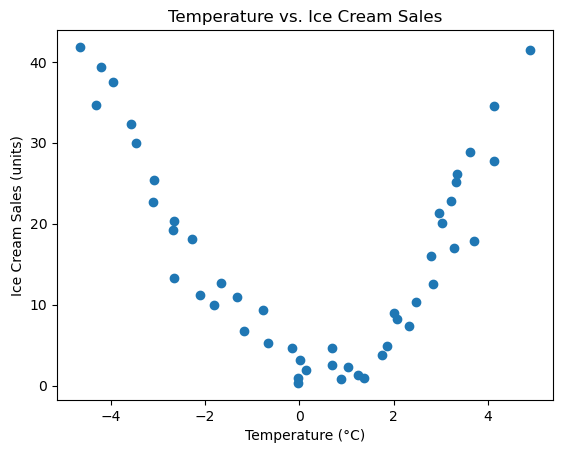

In [4]:
plt.scatter(data['Temperature'], data['units'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Temperature vs. Ice Cream Sales')
plt.show()

In [5]:
input = data['Temperature']
output = data['units']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)


## Add Polynomial Features

In [7]:
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

In [8]:
X_train_poly.shape

(39, 3)

In [9]:
X_train_poly[:10]

array([[ 1.        , -2.11186969,  4.45999359],
       [ 1.        , -3.57855372, 12.8060467 ],
       [ 1.        ,  2.31859124,  5.37586534],
       [ 1.        , -2.67246083,  7.14204687],
       [ 1.        , -3.94966109, 15.59982272],
       [ 1.        , -3.10844012,  9.66239999],
       [ 1.        ,  3.21136614, 10.31287251],
       [ 1.        ,  3.27004407, 10.69318821],
       [ 1.        ,  4.13086796, 17.06407011],
       [ 1.        , -1.32637898,  1.75928121]])

## Apply Linear Regrresion Model

In [10]:
LR = LinearRegression()
LR.fit(X_train_poly, y_train)

LinearRegression()

In [11]:
y_test_pred = LR.predict(X_test_poly)


In [12]:
y_pred = LR.predict(poly.fit_transform(input.values.reshape(-1, 1)))

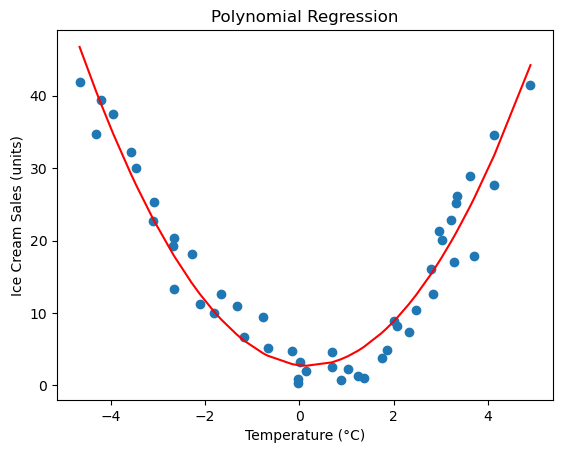

In [13]:
plt.scatter(input, output)
plt.plot(input, y_pred, 'r-')
plt.title("Polynomial Regression")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()


In [14]:
R2  = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print("R2 Score:", R2)
print("Mean Squared Error:", mse)

R2 Score: 0.8430551371938841
Mean Squared Error: 14.87879644098147
